In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data1.csv', index_col = 0)
ts = pd.read_csv('data2.csv', index_col = 0)

In [16]:
df

,height_cm,weight_kg,spend_10k,gender,pay_method
0,173.476999,49.577273,35.267797,Male,Card
1,169.032150,58.861072,14.737174,Female,Card
2,174.533820,65.732510,21.277974,Female,Card
3,180.661209,67.068987,15.220373,Female,Card
4,168.360926,60.253484,15.476183,Female,Card
...,...,...,...,...,...
395,166.715770,75.038894,26.161395,Female,Card
396,158.008058,62.805657,19.850264,Female,QuickPay
397,179.477107,73.236573,27.980112,Male,Cash
398,169.198221,65.162917,22.973663,Male,Cash


In [17]:
ts

,visitors
date,
2025-05-22,99.211295
2025-05-23,104.059954
2025-05-24,130.540355
2025-05-25,124.035148
2025-05-26,105.455674
...,...
2025-09-14,119.423880
2025-09-15,102.803156
2025-09-16,92.168478


In [18]:
# -----------------------------
# 기술통계 표 (pandas)
# -----------------------------
desc_numeric = df[['height_cm','weight_kg','spend_10k']].describe().T
desc_categorical = df[['gender','pay_method']].apply(lambda s: s.value_counts())

In [19]:
desc_numeric

,count,mean,std,min,25%,50%,75%,max
height_cm,400.0,170.157840,6.722132,147.311129,165.411895,170.414536,174.414910,196.969120
weight_kg,400.0,64.640234,10.003158,37.532441,57.870527,64.742001,71.003198,95.885157
spend_10k,400.0,25.829191,15.925269,3.533351,14.606396,22.088849,32.353530,91.483576


In [20]:
desc_categorical

,gender,pay_method
Card,NaN,260.0
Cash,NaN,80.0
Female,198.0,NaN
Male,202.0,NaN
QuickPay,NaN,60.0


In [21]:
df['gender'].value_counts()

gender
Male      202
Female    198
Name: count, dtype: int64

In [22]:
df['pay_method'].value_counts()

pay_method
Card        260
Cash         80
QuickPay     60
Name: count, dtype: int64

# matplotlib의 그래프 표시 코드 뼈대

plt.figure(figsize = (가로크기, 세로크기))

-> 그래프 그리기 전에 약간의 데이터 전처리 필요하면 그래프 그리기 직전에 넣기도

plt.hist(여기가 핵심)

plt.title(제목)

plt.xlabel(x라벨)

plt.ylabel(y라벨)

-> 추가로 옵션 넣고 싶으면 show() 끝나기 전에 아무때나 넣으면 됌

plt.show()



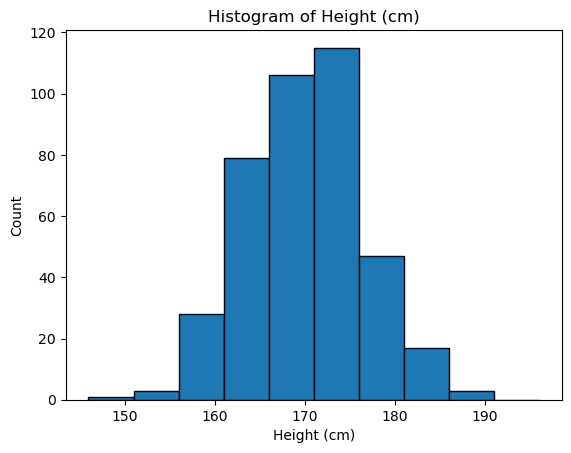

In [73]:
# 히스토그램
plt.figure()
plt.hist(df['height_cm'], bins=bins, edgecolor='black')
plt.title('Histogram of Height (cm)')
plt.xlabel('Height (cm)')
plt.ylabel('Count')
plt.show()

# seaborn의 그래프 표시 코드 뼈대

sns.함수이름(data = , x = , y = , 나머지 옵션들) -> data는 넣어도 되고 안넣어도 되지만 x랑 y 둘 중 하나는 꼭 필수

<Axes: xlabel='height_cm', ylabel='Count'>

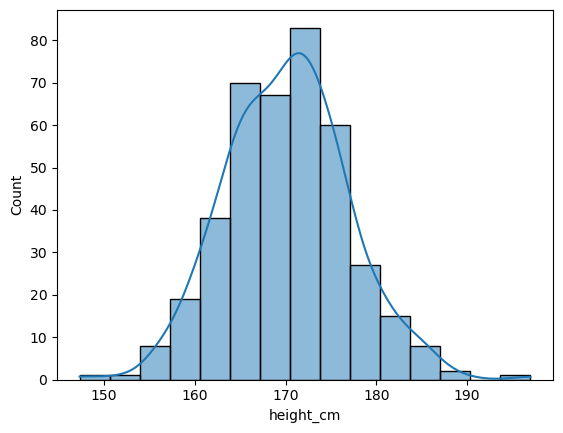

In [74]:
sns.histplot(data=df, x='height_cm', bins=15, kde=True, stat='count')

In [58]:
# -----------------------------
# 1) 도수분포표 (height_cm, 5cm bin) & 히스토그램
# -----------------------------
bins = np.arange(int(df.height_cm.min())-1, int(df.height_cm.max())+5, 5)
freq_table = pd.cut(df['height_cm'], bins=bins, right=False).value_counts().sort_index()
freq_df = pd.DataFrame({
    'bin': [f'[{i},{i+5})' for i in bins[:-1]],
    'count': freq_table.values,
    'rel_freq': (freq_table/len(df)).values, # 각 구간에 속한 데이터 개수를 전체 표본 수로 나눈 값 -> 그 구간이 차지하는 비율
    'cum_rel_freq': freq_table.cumsum().values/len(df) # rel_freq를 누적해서 합산한 값
})
display(freq_df)

,bin,count,rel_freq,cum_rel_freq
0,"[146,151)",1,0.0025,0.0025
1,"[151,156)",3,0.0075,0.0100
2,"[156,161)",28,0.0700,0.0800
3,"[161,166)",79,0.1975,0.2775
4,"[166,171)",106,0.2650,0.5425
5,"[171,176)",115,0.2875,0.8300
6,"[176,181)",47,0.1175,0.9475
7,"[181,186)",17,0.0425,0.9900
8,"[186,191)",3,0.0075,0.9975
9,"[191,196)",0,0.0000,0.9975


In [24]:
bins

array([146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196])

# matplotlib - 히스토그램

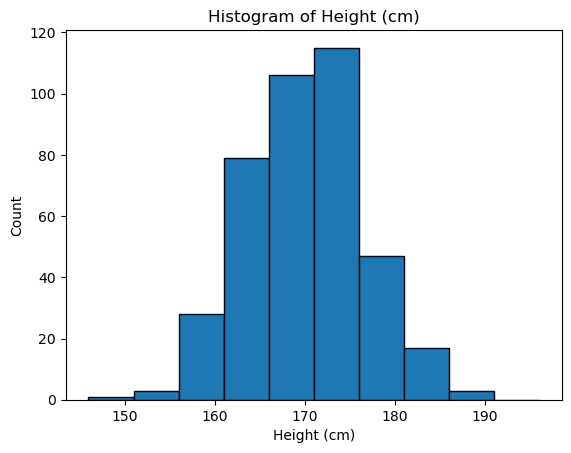

In [25]:
# 히스토그램
plt.figure()
plt.hist(df['height_cm'], bins=bins, edgecolor='black')
plt.title('Histogram of Height (cm)')
plt.xlabel('Height (cm)')
plt.ylabel('Count')
plt.show()

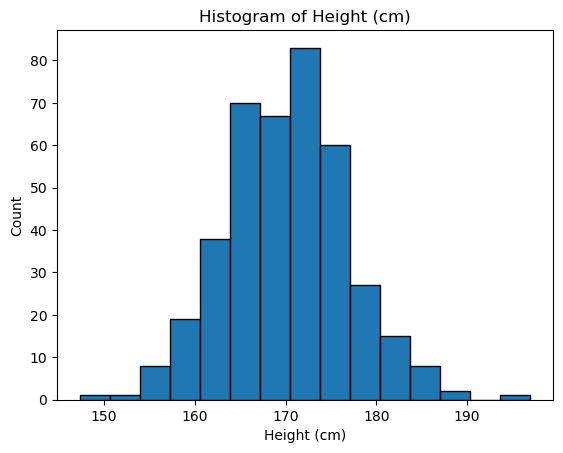

In [26]:
# 히스토그램 (도수분포표 굳이 그릴거 아니면 bins는 숫자 쓰면 됨)
plt.figure()
plt.hist(df['height_cm'], bins=15, edgecolor='black')
plt.title('Histogram of Height (cm)')
plt.xlabel('Height (cm)')
plt.ylabel('Count')
plt.show()

##plt.hist()의 주요 키워드

- bins: 구간 개수(정수) 또는 경계 배열.

- range: (min, max) 표시 구간.

- density: True면 확률밀도로 정규화.

- histtype: 'bar'|'step'|'stepfilled'. -> (그냥 막대기 / 계단 (색깔 안채워짐) / 계단 (색깔 채워짐)

- 스타일 공통: color, alpha, edgecolor, linewidth.

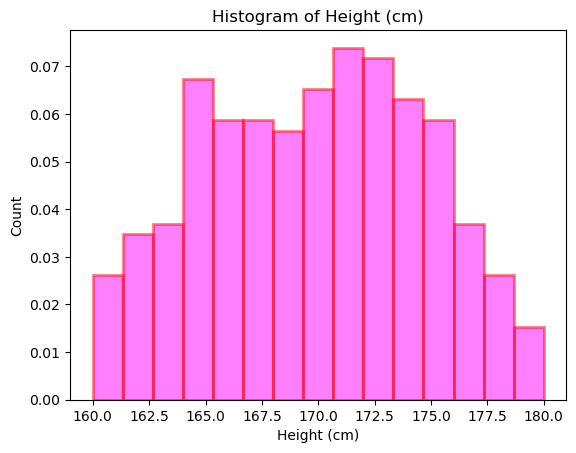

In [57]:
# 옵션 많이 넣어보기
plt.figure()
plt.hist(df['height_cm'], bins=15,range = (160, 180), density = True, histtype = 'bar', edgecolor='red', color = 'magenta', alpha = 0.5, linewidth = 2)
plt.title('Histogram of Height (cm)')
plt.xlabel('Height (cm)')
plt.ylabel('Count')
plt.show()

# seaborn - 히스토그램

<Axes: xlabel='height_cm', ylabel='Count'>

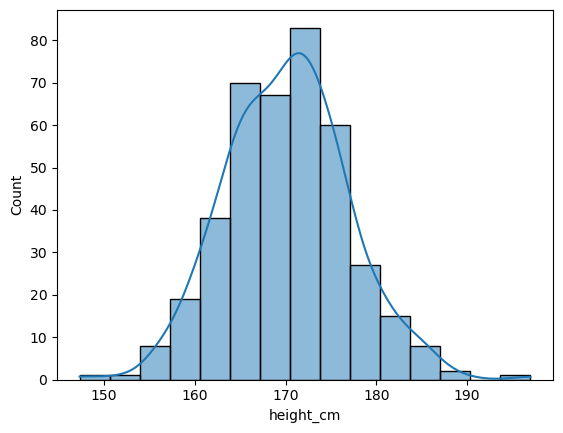

In [60]:
sns.histplot(data=df, x='height_cm', bins=15, kde=True, stat='count')

<Axes: xlabel='height_cm', ylabel='Count'>

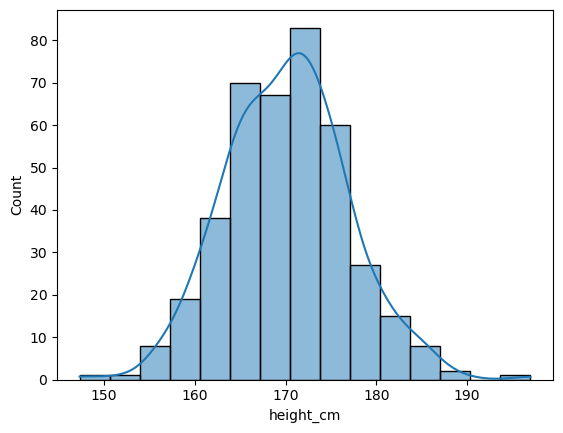

In [59]:
# 참고로 sns에서 data는 굳이 안 넣어주고 사용할 수도 있음 -> 대신 x나 y에 확실하게 데이터 넣기)
sns.histplot(x=df['height_cm'], bins=15, kde=True, stat='count')

## sns.hisplot()의 주요 키워드

- x/data: 칼럼/데이터프레임.

- bins/binwidth: 구간 수/폭.

- stat: 'count'|'density'|'probability'

  - probability : 해당 구간 데이터 수 / 전체 데이터 수

  - density : probability에서 폭을 나누어 준 것



- kde: 커널밀도 곡선 추가. -> bin 크기에 따라 모양이 많이 달라지니까 부드럽게 분포 곡선을 그려주는 기능

- hue: 범주별 색 분리. (조금 더 똑똑하게 고차원적으로 시각화 하는 방법)

- multiple: 'layer'|'stack'|'dodge'. (layer : 투명하게 겹쳐서 보여줌, dodge : 막대를 옆으로 나란히 배치, stack : 그룹별 막대를 위로 쌓음)

- element: 'bars'|'step'|'poly'. (bars : 일반적인 꽉 찬 막대, step : 테두리만 그려서 계단 모양, poly : bin 중앙을 잇는 다각형 모양)

스타일 공통: palette, alpha, linewidth.
(palette의 자세한 사용법은 여기 참고 https://teddylee777.github.io/visualization/matplotlib-colorcode/)

<Axes: xlabel='height_cm', ylabel='Count'>

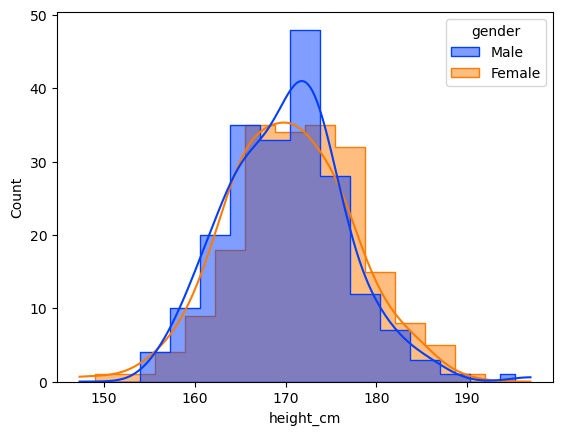

In [30]:
# 옵션 많이 넣어보기
sns.histplot(data = df, x='height_cm', bins=15, hue = 'gender', kde=True, stat='count', multiple = 'dodge', element = 'step', palette='bright')

# matplotlib = 막대그래프

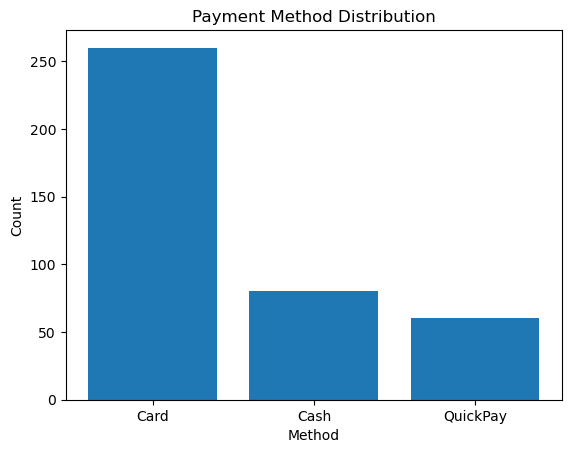

In [31]:
# -----------------------------
# 2) 막대그래프: 결제수단 분포
# -----------------------------
plt.figure()
pay_counts = df['pay_method'].value_counts()
plt.bar(pay_counts.index, pay_counts.values)
plt.title('Payment Method Distribution')
plt.xlabel('Method')
plt.ylabel('Count')
plt.show()

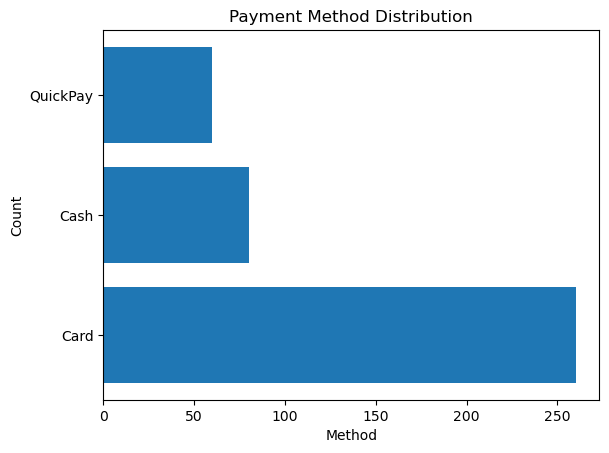

In [32]:
plt.figure()
pay_counts = df['pay_method'].value_counts()
plt.barh(pay_counts.index, pay_counts.values)
plt.title('Payment Method Distribution')
plt.xlabel('Method')
plt.ylabel('Count')
plt.show()

## plt.bar()의 주요 키워드

- x: 범주 라벨/좌표.

- height: 막대 값. (barh인 경우)

- width: 막대 폭. (bar인 경우)

- 누적/그룹형은 plt.bar를 여러 번 호출(옆/위로 쌓기).

- 스타일: color, edgecolor, alpha.

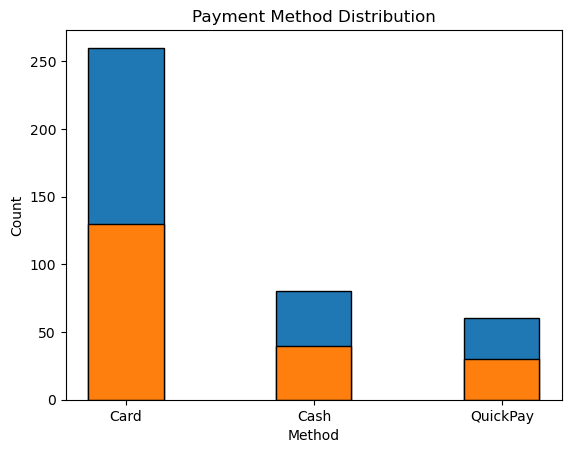

In [33]:
plt.figure()
pay_counts = df['pay_method'].value_counts()
plt.bar(pay_counts.index, pay_counts.values, width = 0.4, edgecolor = 'black')
plt.bar(pay_counts.index, pay_counts.values * 0.5,  width = 0.4, edgecolor = 'black')
plt.title('Payment Method Distribution')
plt.xlabel('Method')
plt.ylabel('Count')
plt.show()

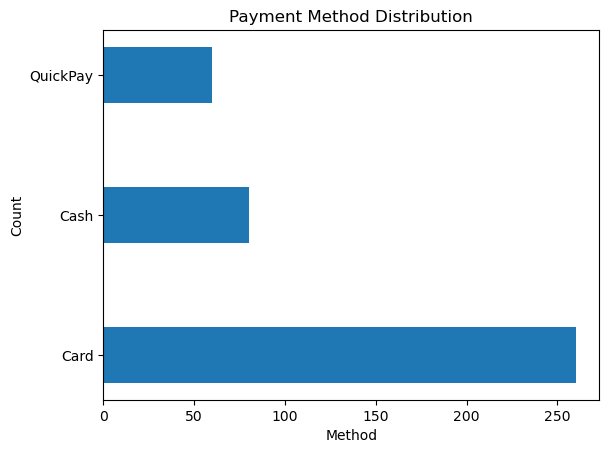

In [34]:
plt.figure()
pay_counts = df['pay_method'].value_counts()
plt.barh(pay_counts.index, pay_counts.values, height = 0.4)
plt.title('Payment Method Distribution')
plt.xlabel('Method')
plt.ylabel('Count')
plt.show()

# seaborn - 막대그래프

<Axes: xlabel='pay_method', ylabel='count'>

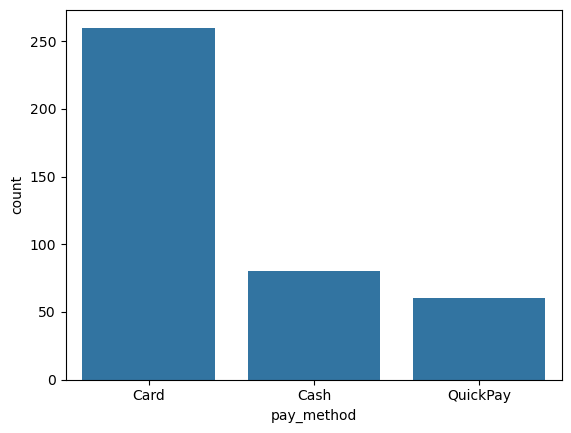

In [61]:
sns.countplot(data=df, x='pay_method')

<Axes: xlabel='count', ylabel='pay_method'>

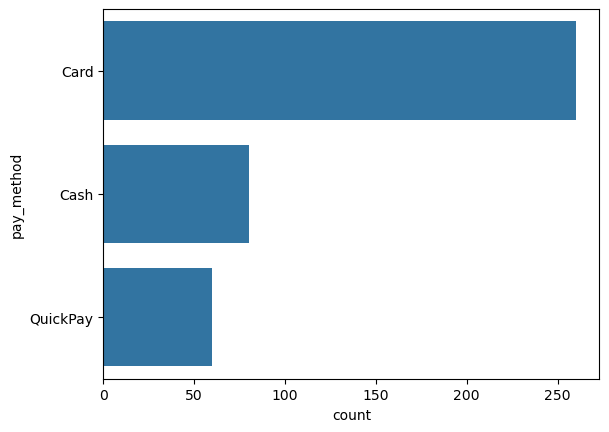

In [62]:
sns.countplot(data=df, y='pay_method')

## sns.countplot()의 주요 키워드


hue: 범주별로 색 분리

order: 범주 순서 고정

dodge: hue 막대 옆으로 분리.(True, False)

<Axes: xlabel='pay_method', ylabel='count'>

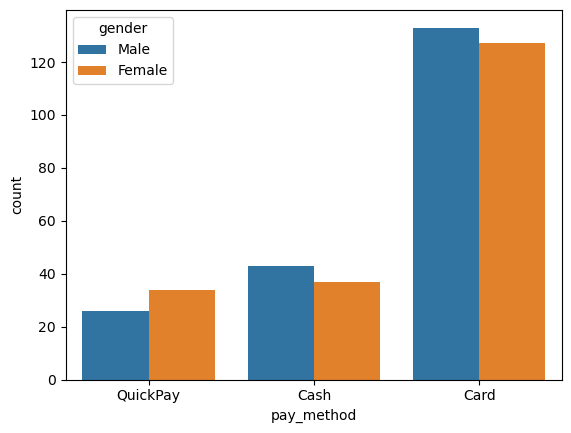

In [63]:
sns.countplot(data=df, x='pay_method', hue = 'gender', order = ['QuickPay', 'Cash', 'Card'], dodge=True)

# matplotlib - 원 그래프

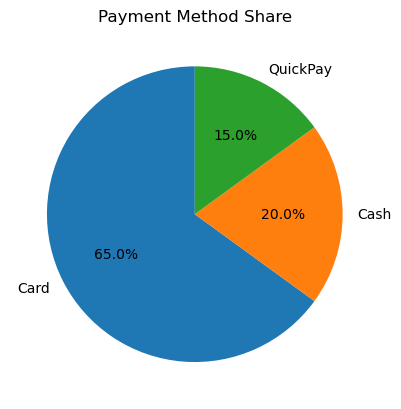

In [38]:
# -----------------------------
# 3) 원그래프: 결제수단 비율(항목 3개 → 적합한 예)
# -----------------------------
plt.figure()
plt.pie(pay_counts.values, labels=pay_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Payment Method Share')
plt.show()

## plt.pie()의 주요 키워드

- autopct: 비율 표시 포맷

    - '%d%%' → 정수 퍼센트 (예: 40%)

    - '%.2f%%' → 소수점 2자리 (예: 40.00%)
 
    - '%.1f' → 값만 표시 (예: 40.0)

- startangle: 시작 각도(90 추천).

- explode: 조각 분리.

- 항목 많을수록 가독성 급락 → 막대그래프 권장.

In [39]:
pay_counts

pay_method
Card        260
Cash         80
QuickPay     60
Name: count, dtype: int64

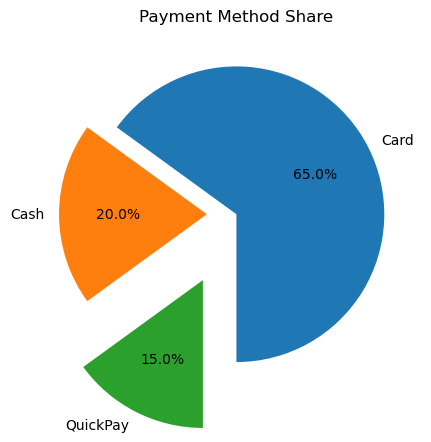

In [40]:
plt.figure()
plt.pie(pay_counts.values, labels=pay_counts.index, autopct='%1.1f%%', startangle=270, explode = [0, 0.2, 0.5])
plt.title('Payment Method Share')
plt.show()

## seaborn은 색깔 입히기용

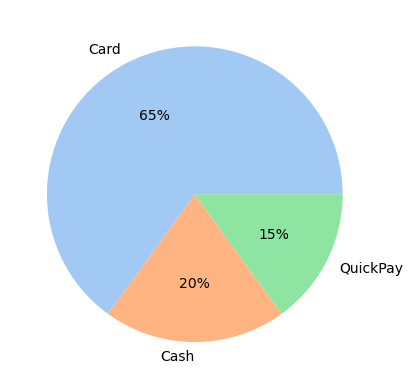

In [56]:

colors = sns.color_palette('pastel')[0:3]

plt.pie(pay_counts.values, labels = pay_counts.index, colors = colors, autopct='%.0f%%')
plt.show()

# matplotlib - 박스플롯

C:\Users\sju12\AppData\Local\Temp\ipykernel_3124\4050696282.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(grouped, labels=['Male','Female'], showfliers=True)


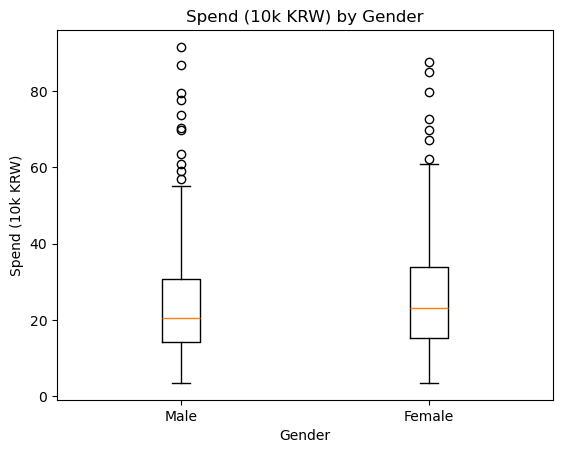

In [41]:
# -----------------------------
# 4) 박스플롯: 성별별 지출 분포 비교
# -----------------------------
plt.figure()
grouped = [df.loc[df['gender']=='Male','spend_10k'],
           df.loc[df['gender']=='Female','spend_10k']]
plt.boxplot(grouped, labels=['Male','Female'], showfliers=True)
plt.title('Spend (10k KRW) by Gender')
plt.xlabel('Gender')
plt.ylabel('Spend (10k KRW)')
plt.show()

## plt.boxplot()의 주요 인자

- showfliers: 이상치 점 표시.

- whis = upper bound, lower bound 계산할 때 IQR에 곱해지는 상수값 (기본값 = 1.5)
  - (upper bound의 계산법은  Q3 + whis *(Q3 - Q1), lower bound 의 계산법은 Q1 - whis *(Q3 - Q1) 입니다. )

- notch: 중앙값의 95% 신뢰구간

C:\Users\sju12\AppData\Local\Temp\ipykernel_3124\2858679073.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(grouped, labels=['Male','Female'], showfliers=False, whis = 2.0, notch = True)


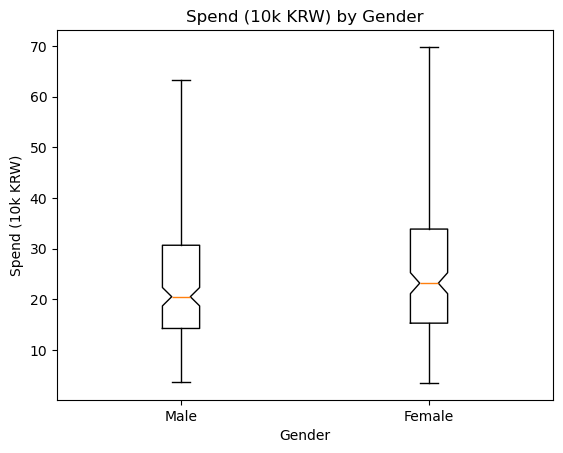

In [42]:
plt.figure()
grouped = [df.loc[df['gender']=='Male','spend_10k'],
           df.loc[df['gender']=='Female','spend_10k']]
plt.boxplot(grouped, labels=['Male','Female'], showfliers=False, whis = 2.0, notch = True)
plt.title('Spend (10k KRW) by Gender')
plt.xlabel('Gender')
plt.ylabel('Spend (10k KRW)')
plt.show()

# seaborn - boxplot

<Axes: xlabel='gender', ylabel='spend_10k'>

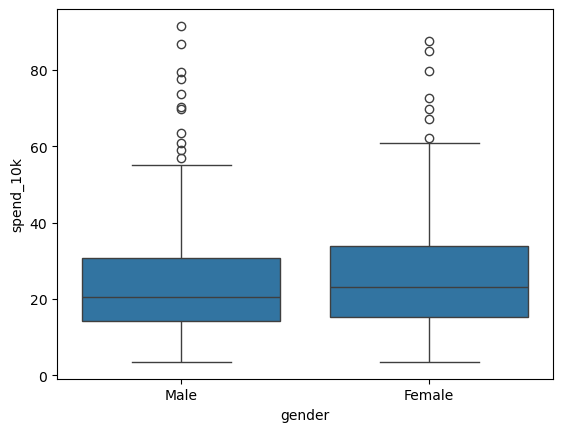

In [64]:
sns.boxplot(data=df, x='gender', y='spend_10k', showfliers=True)

## sns.boxplot()의 주요 키워드

- hue: 범주별로 분리하는 그거

- dodge: hue 그룹 분리할거냐 같이 보여줄거냐?

- showfilters와 whis는 matplotlib 함수와 그대로


<Axes: xlabel='gender', ylabel='spend_10k'>

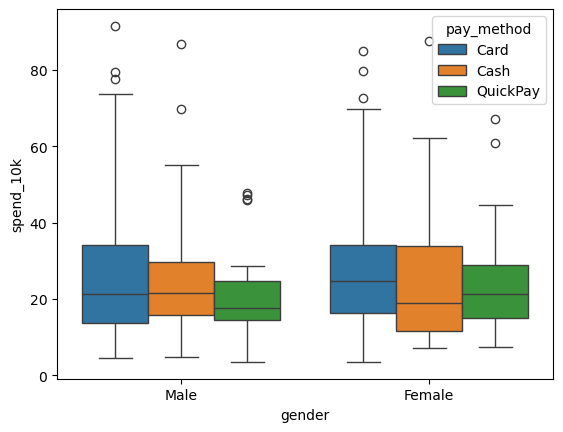

In [67]:
sns.boxplot(data=df, x='gender', y='spend_10k', showfliers=True, whis = 2.0, hue = 'pay_method', dodge = True)

# matplotlib - scatter

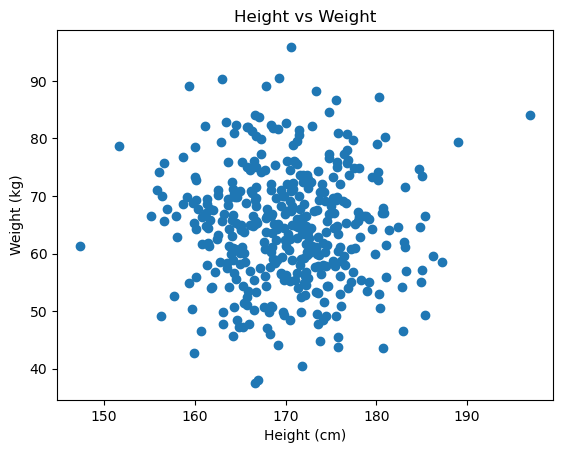

In [45]:
# -----------------------------
# 5) 산점도: 키 vs 몸무게 (관계)
# -----------------------------
plt.figure()
plt.scatter(df['height_cm'], df['weight_kg'])
plt.title('Height vs Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

## plt.scatter의 주요 키워드

- s: 점 크기, alpha: 투명도(0-1), marker: 점 모양.

- (참고) matplotlib에서 지원하는 marker의 종류

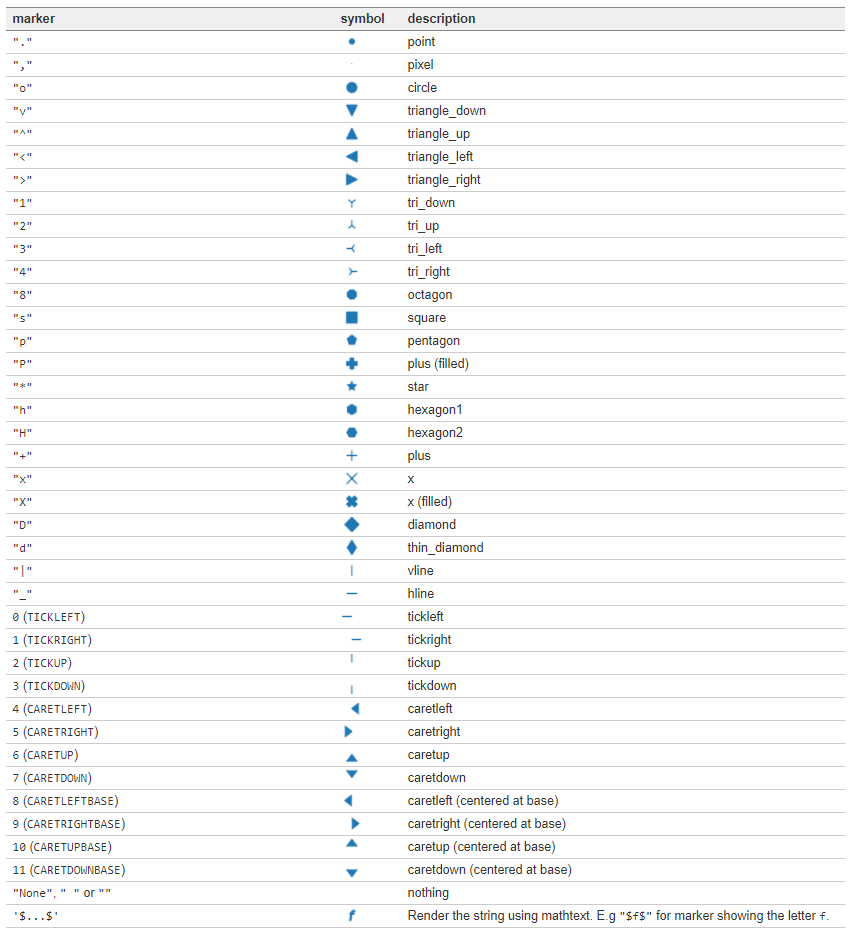

- (참고) matplotlib에서 제공하는 color, line styles 종류


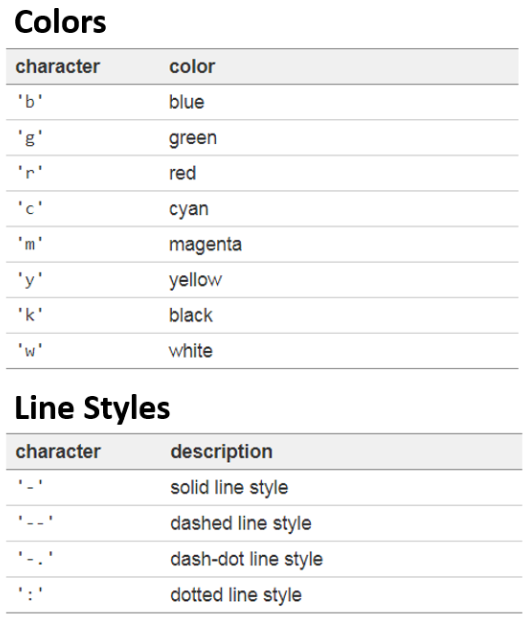

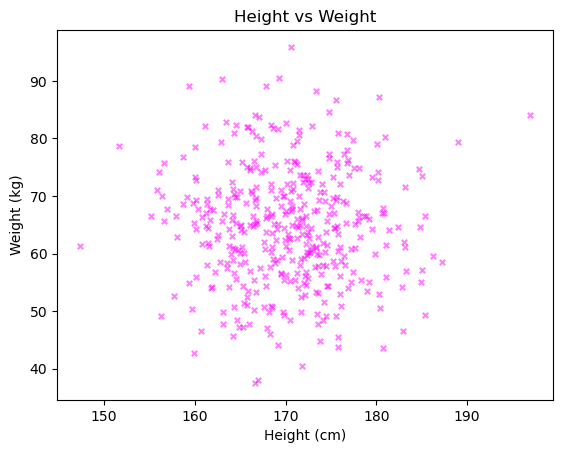

In [46]:
plt.figure()
plt.scatter(df['height_cm'], df['weight_kg'], s = 15, alpha = 0.5, marker = 'x', color = 'magenta')
plt.title('Height vs Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

# seaborn - scatterplot

<Axes: xlabel='height_cm', ylabel='weight_kg'>

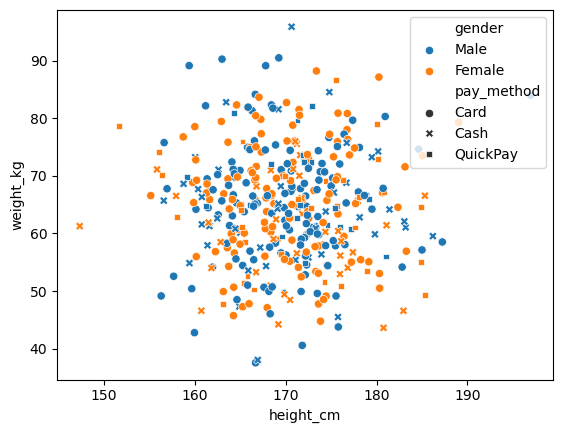

In [68]:
sns.scatterplot(data=df, x='height_cm', y='weight_kg', hue='gender', style='pay_method')

## sns.scatterplot의 주요 키워드

- hue: 알죠?, style: 마커 모양, size: 점 크기

# matplotlib - 선그래프

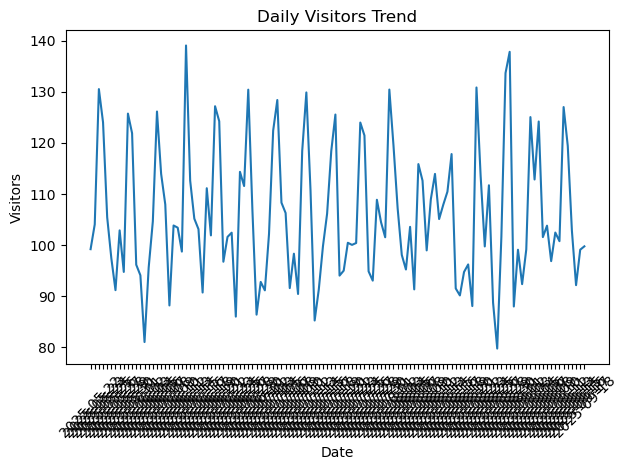

In [70]:
# -----------------------------
# 6) 선그래프: 일별 방문자 추이
# -----------------------------
plt.figure()
plt.plot(ts.index, ts['visitors'])
plt.title('Daily Visitors Trend')
plt.xlabel('Date')
plt.ylabel('Visitors')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

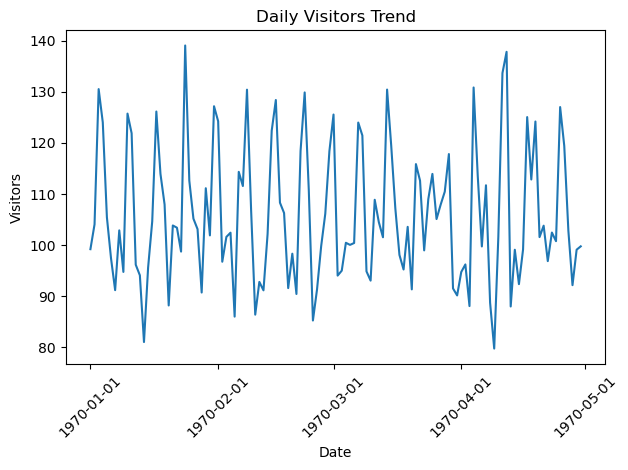

In [71]:
plt.figure()
plt.plot(ts.index, ts['visitors'])
plt.title('Daily Visitors Trend')
plt.xlabel('Date')
plt.ylabel('Visitors')

# 날짜 라벨 자동 회전
plt.xticks(rotation=45)

# 날짜 포맷 지정 (예: '2025-06-01', '2025-07-01' …)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# 눈금 간격 (예: 한 달 단위)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.tight_layout()
plt.show()

## plt.plot()의 주요 키워드
- linewidth, linestyle, marker

# seaborn - 선그래프

<Axes: xlabel='date', ylabel='visitors'>

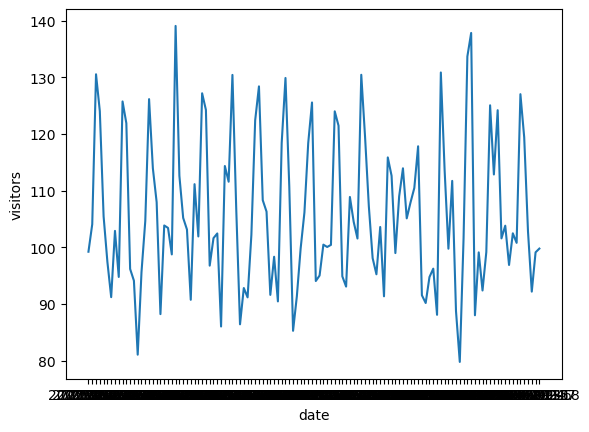

In [49]:
sns.lineplot(x=ts.index, y=ts['visitors'])

C:\Users\sju12\AppData\Local\Temp\ipykernel_3124\3693418334.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=ts.index, y=ts['visitors'], estimator=None, ci=None)


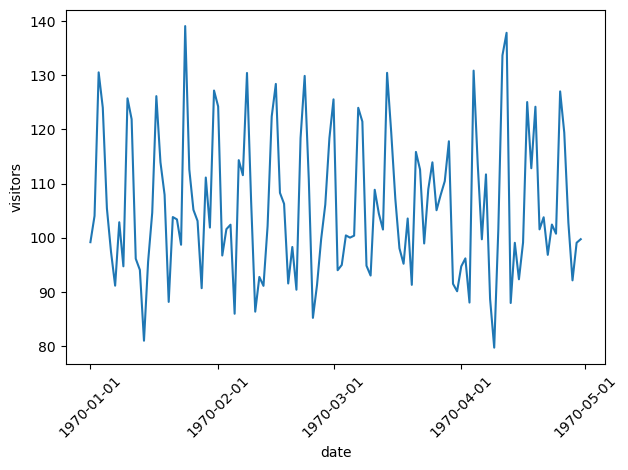

In [50]:
import matplotlib.dates as mdates

sns.lineplot(x=ts.index, y=ts['visitors'], estimator=None, ci=None)

# 날짜 라벨 자동 회전
plt.xticks(rotation=45)

# 날짜 포맷 지정 (예: '2025-06-01', '2025-07-01' …)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# 눈금 간격 (예: 한 달 단위)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.tight_layout()
plt.show()

# matplotlib - 히트맵

,height_cm,weight_kg,spend_10k
height_cm,1.000000,-0.013532,-0.024700
weight_kg,-0.013532,1.000000,-0.016566
spend_10k,-0.024700,-0.016566,1.000000


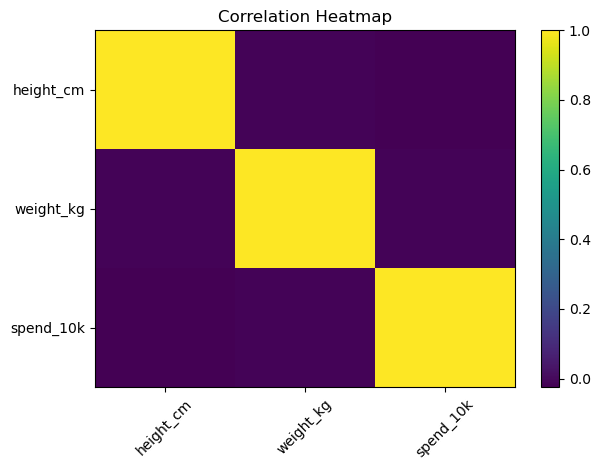

In [51]:
# -----------------------------
# 7) 히트맵: 수치형 변수 상관행렬
# -----------------------------
corr = df[['height_cm','weight_kg','spend_10k']].corr()
display(corr)

plt.figure()
plt.imshow(corr.values, aspect='auto')
plt.title('Correlation Heatmap')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.tight_layout()
plt.show()

## plt.imshow()의 주요 키워드
- aspect='auto'|'equal': 픽셀 종횡비

,height_cm,weight_kg,spend_10k
height_cm,1.000000,-0.013532,-0.024700
weight_kg,-0.013532,1.000000,-0.016566
spend_10k,-0.024700,-0.016566,1.000000


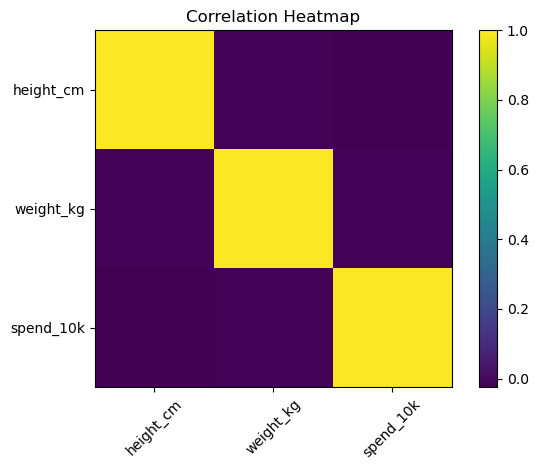

In [52]:
corr = df[['height_cm','weight_kg','spend_10k']].corr()
display(corr)

plt.figure()
plt.imshow(corr.values, aspect='equal')
plt.title('Correlation Heatmap')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.tight_layout()
plt.show()

# seaborn - 히트맵

<Axes: >

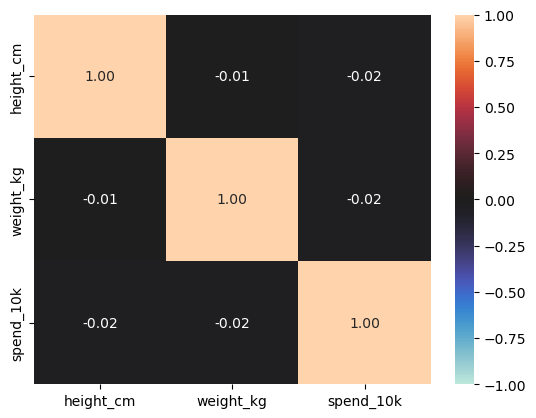

In [72]:
sns.heatmap(corr, annot=True, fmt=".2f", vmin=-1, vmax=1, center=0)

## heatmap의 주요 키워드

- annot: 셀 값 표기, fmt: 표시 포맷.

- vmin/vmax/center: 색 스케일 고정(중심 0 설정 등).

<Axes: >

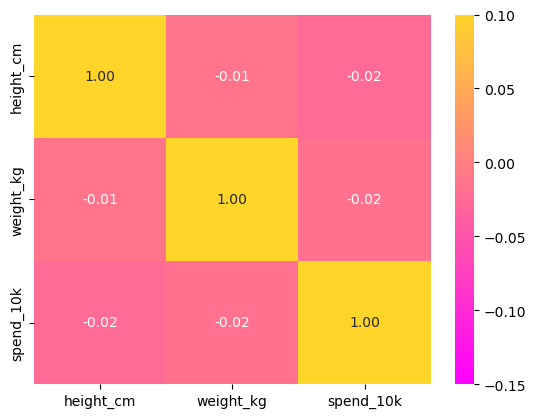

In [54]:
sns.heatmap(corr, annot=True, fmt=".2f", vmin=-0.15, vmax=0.1, center=0, cmap='spring')

(참고) seaborn의 colormap 종류는 링크를 참고하세요
https://jrc-park.tistory.com/155

